In [10]:
import geopandas as gpd
import pandas as pd
import pysal as ps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import rtree

Traemos el archivo con  la información geográfica de las secciones censales del INE

In [11]:
df_INE=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\INE\cartografia_censo2011_nacional_INE_EPGS_25830_ETRS89_UTM_30N\SECC_CPV_E_20111101_01_R_INE.shp', encoding='utf8')

In [12]:
df_INE.shape

(35960, 22)

In [13]:
df_INE.head(5)


CCA CDIS  CLAU2 CMUN CNUT0 CNUT1 CNUT2 CNUT3 CPRO CSEC  \
0  16   01  01001  001    ES     2     1     1   01  001   
1  16   01  01001  001    ES     2     1     1   01  002   
2  16   01  01002  002    ES     2     1     1   01  001   
3  16   01  01002  002    ES     2     1     1   01  002   
4  16   01  01002  002    ES     2     1     1   01  003   

                         ...                               CUSEC         NCA  \
0                        ...                          0100101001  Pa�s Vasco   
1                        ...                          0100101002  Pa�s Vasco   
2                        ...                          0100201001  Pa�s Vasco   
3                        ...                          0100201002  Pa�s Vasco   
4                        ...                          0100201003  Pa�s Vasco   

               NMUN         NPRO OBJECTID   OBS    Shape_Leng    Shape_area  \
0  Alegr�a-Dulantzi  Araba/�lava        1  None  34474.734278  1.551393e+07   
1  Alegr�a-Dulantzi  Araba/�lava        2  None   8620.042319  4.410972e+06   
2           Amurrio  Araba/�lava        3  None  47379.027701  3.535737e+07   
3           Amurrio  Araba/�lava        4  None  31169.713203  3.873652e+07   
4           Amurrio  Araba/�lava        5  None   4244.249418  8.494741e+05   

      Shape_len                                           geometry  
0  34474.734278  (POLYGON ((541571.2089999998 4745050.1195, 541...  
1   8620.042319  POLYGON ((541370.9625000004 4745058.6226, 5413...  
2  47379.027700  (POLYGON ((503618.5531000001 4759559.7981, 503...  
3  31169.713203  POLYGON ((508942.5675999997 4765890.6743, 5089...  
4   4244.249418  POLYGON ((499919.4973999998 4766600.281400001,...  

[5 rows x 22 columns]

In [14]:
df_INE.dtypes

CCA            object
CDIS           object
CLAU2          object
CMUN           object
CNUT0          object
CNUT1          object
CNUT2          object
CNUT3          object
CPRO           object
CSEC           object
CUDIS          object
CUMUN          object
CUSEC          object
NCA            object
NMUN           object
NPRO           object
OBJECTID        int64
OBS            object
Shape_Leng    float64
Shape_area    float64
Shape_len     float64
geometry       object
dtype: object

In [15]:
df_INE['centroid'] = df_INE.centroid

In [16]:
df_INE.CUSEC.value_counts

<bound method Series.value_counts of 0        0100101001
1        0100101002
2        0100201001
3        0100201002
4        0100201003
5        0100201004
6        0100201005
7        0100201006
8        0100201007
9        0100301001
10       0100401001
11       0100601001
12       0100801001
13       0100901001
14       0101001001
15       0101001002
16       0101101001
17       0101301001
18       0101401001
19       0101601001
20       0101701001
21       0101801001
22       0101901001
23       0102001001
24       0102101001
25       0102201001
26       0102301001
27       0102701001
28       0102801001
29       0103001001
            ...    
35930    5200105001
35931    5200105002
35932    5200105003
35933    5200105004
35934    5200105005
35935    5200105006
35936    5200105007
35937    5200106001
35938    5200106002
35939    5200106003
35940    5200107001
35941    5200107002
35942    5200107003
35943    5200107004
35944    5200107005
35945    5200107006
35946    5200108001
359

In [19]:
mad_INE=INE_madiva[(INE_madiva['CPRO']=='28') & (INE_madiva['CMUN']=='079')]
bcn_INE=INE_madiva[(INE_madiva['CPRO']=='08') & (INE_madiva['CMUN']=='019')]

NameError: name 'INE_madiva' is not defined

In [18]:
#una forma cutre de hacer un contador de elementos diferentes de la columna
mad_INE.groupby('CUSEC').CUSEC.nunique().shape

NameError: name 'mad_INE' is not defined

In [ ]:
bcn_INE.groupby('CUSEC').CUSEC.nunique().shape

Traemos el resto de archivos

In [20]:
madiva=pd.read_csv(r'C:\Users\e001255\Desktop\Madiva\data\ignacio_sanmartin_2_geo\ignacio_sanmartin_2_geo.csv', sep=",", decimal=",")
ine_features=pd.read_csv(r'C:\Users\e001255\Desktop\Madiva\data\INE\INE_all.csv',sep=";",decimal=",")
bibliotecas=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\bibliotecas.geojson')
bomberos=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\bomberos.geojson')
cines=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\cines.geojson')
colegios=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\colegios.geojson')
farmacias=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\farmacias.geojson')
guarderias=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\guarderias.geojson')
hospitales=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\hospitales.geojson')
hoteles=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\hoteles.geojson')
monumentos=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\monumentos.geojson')
museos=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\museos.geojson')
parques=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\parques.geojson')
piscinas=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\piscinas.geojson')
pistas=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\pistas.geojson')
policia=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\policia.geojson')
polideportivos=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\polideportivos.geojson')
teatros=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\teatros.geojson')
universidades=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\universidades.geojson')
veterinarios=gpd.read_file(r'C:\Users\e001255\Desktop\Madiva\data\explicativas\drive-download-20170219T210440Z\veterinarios.geojson')


In [21]:
bibliotecas.dtypes

@id                    object
access                 object
addr:city              object
addr:country           object
addr:floor             object
addr:housename         object
addr:housenumber       object
addr:postcode          object
addr:state             object
addr:street            object
alt_name               object
amenity                object
building               object
building:colour        object
building:levels        object
building:material      object
building:part          object
construction           object
contact:email          object
description            object
designation            object
ele                    object
email                  object
facebook               object
geometry               object
height                 object
id                     object
internet_access        object
internet_access:fee    object
landuse                object
layer                  object
leisure                object
name                   object
name:ca   

In [ ]:
# se ve que hay atributos que pueden ser tanto polígonos como puntos
bibliotecas.shape


Cómo los datos de Madiva son variables numéricas, las pasamos a texto para
poder tener un código de 10 caracteres (2 provincia, 3 municipio, 2 distrito censal,
3 sección censal). Una vez hecho eso creamos un muevo dataframe que une INE y Madiva

In [22]:
def textualizar(x):
    if len(x)==1:
        x='0'+x
    return x

In [23]:
def textualizar2(x):
    if len(x)==1:
        x='00'+x
    if len(x)==2:
        x='0'+x
    return x

In [24]:
madiva['coddistcensal']=madiva['coddistcensal'].astype(str)
madiva['codmunine']=madiva['codmunine'].astype(str)
madiva['codproine']=madiva['codproine'].astype(str)
madiva['codsecccensal']=madiva['codsecccensal'].astype(str)


In [25]:
madiva['PRO']=madiva['codproine'].apply(textualizar)
madiva['MUN']=madiva['codmunine'].apply(textualizar2)
madiva['DIS']=madiva['coddistcensal'].apply(textualizar)
madiva['SEC']=madiva['codsecccensal'].apply(textualizar2)
madiva['PRO+MUN+DIS+SEC']=madiva['PRO']+madiva['MUN']+madiva['DIS']+madiva['SEC']

In [26]:
#comprobamos que la nueva columna tiene 10 caracteres
madiva['PRO+MUN+DIS+SEC'].head(5)

0    0100101001
1    0100101001
2    0100201001
3    1000801001
4    4600501008
Name: PRO+MUN+DIS+SEC, dtype: object

In [29]:
#creamos el nuevo dataframe, uniendo por secciones censales
INE_madiva=df_INE.merge(madiva,how='inner',left_on='CUSEC',right_on='PRO+MUN+DIS+SEC')

In [30]:
INE_madiva.dtypes

CCA                              object
CDIS                             object
CLAU2                            object
CMUN                             object
CNUT0                            object
CNUT1                            object
CNUT2                            object
CNUT3                            object
CPRO                             object
CSEC                             object
CUDIS                            object
CUMUN                            object
CUSEC                            object
NCA                              object
NMUN                             object
NPRO                             object
OBJECTID                          int64
OBS                              object
Shape_Leng                      float64
Shape_area                      float64
Shape_len                       float64
geometry                         object
centroid                         object
cartodb_id                        int64
the_geom                         object


cruzamos los dataframes, para que cada variables explicativas esté asignada a su(s)
secciones censales. Primero generamos un archivo para Madrid y otro para Barcelona,
y con estos vamos interseccionando los datos

In [31]:
mad=INE_madiva[(INE_madiva['CPRO']=='28') & (INE_madiva['CMUN']=='079')]
bcn=INE_madiva[(INE_madiva['CPRO']=='08') & (INE_madiva['CMUN']=='019')]

In [36]:
#ponemos todos los archivos geojson en sistema de proyección google (epsg:4326)
bibliotecas.crs={'init':'epsg:4326'}
bomberos.crs={'init':'epsg:4326'}
cines.crs={'init':'epsg:4326'}
colegios.crs={'init':'epsg:4326'}
farmacias.crs={'init':'epsg:4326'}
guarderias.crs={'init':'epsg:4326'}
hospitales.crs={'init':'epsg:4326'}
hoteles.crs={'init':'epsg:4326'}
monumentos.crs={'init':'epsg:4326'}
museos.crs={'init':'epsg:4326'}
piscinas.crs={'init':'epsg:4326'}
pistas.crs={'init':'epsg:4326'}
policia.crs={'init':'epsg:4326'}
polideportivos.crs={'init':'epsg:4326'}
teatros.crs={'init':'epsg:4326'}
universidades.crs={'init':'epsg:4326'}
veterinarios.crs={'init':'epsg:4326'}

In [41]:
#ponemos los archivos procedentes INE&madiva en proyección (epsg:25830)
mad=mad.to_crs({'init': 'epsg:25830'})
bcn=bcn.to_crs({'init': 'epsg:25830'})
bibliotecas=bibliotecas.to_crs({'init': 'epsg:25830'})
bomberos=bomberos.to_crs({'init': 'epsg:25830'})
cines=cines.to_crs({'init': 'epsg:25830'})
colegios=colegios.to_crs({'init': 'epsg:25830'})
farmacias=farmacias.to_crs({'init': 'epsg:25830'})
guarderias=guarderias.to_crs({'init': 'epsg:25830'})
hospitales=hospitales.to_crs({'init': 'epsg:25830'})
hoteles=hoteles.to_crs({'init': 'epsg:25830'})
monumentos=monumentos.to_crs({'init': 'epsg:25830'})
museos=museos.to_crs({'init': 'epsg:25830'})
piscinas=piscinas.to_crs({'init': 'epsg:25830'})
pistas=pistas.to_crs({'init': 'epsg:25830'})
policia=policia.to_crs({'init': 'epsg:25830'})
polideportivos=polideportivos.to_crs({'init': 'epsg:25830'})
teatros=teatros.to_crs({'init': 'epsg:25830'})
universidades=universidades.to_crs({'init': 'epsg:25830'})
veterinarios=veterinarios.to_crs({'init': 'epsg:25830'})

In [45]:
#interseccionamos los archivos mad con los archivos geojson así tenemos assignados los atributos por ss.cc
mad_biblio=gpd.sjoin(mad,bibliotecas,how='left',op='intersects')
bcn_biblio=gpd.sjoin(bcn,bibliotecas,how='left',op='intersects')

In [46]:
mad_biblio.dtypes

CCA                        object
CDIS                       object
CLAU2                      object
CMUN                       object
CNUT0                      object
CNUT1                      object
CNUT2                      object
CNUT3                      object
CPRO                       object
CSEC                       object
CUDIS                      object
CUMUN                      object
CUSEC                      object
NCA                        object
NMUN                       object
NPRO                       object
OBJECTID                    int64
OBS                        object
Shape_Leng                float64
Shape_area                float64
Shape_len                 float64
geometry                   object
centroid                   object
cartodb_id                  int64
the_geom                   object
coddistcensal              object
codmunine                  object
codproine                  object
codsecccensal              object
euros_m2_resid

In [53]:
mad_biblio.shape
bcn_biblio.shape

(844, 108)

In [51]:
mad_biblio.groupby('CUSEC').CUSEC.nunique().shape

(2356L,)

In [52]:
bcn_biblio.groupby('CUSEC').CUSEC.nunique().shape

(829L,)

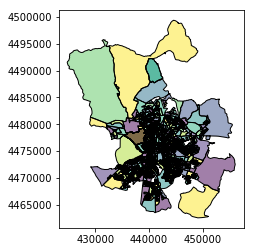

In [55]:
mad_biblio.plot()

(2373, 108)

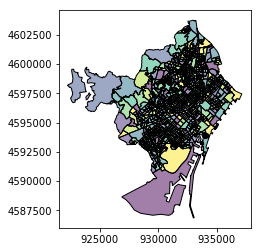

In [52]:
bcn.plot()
plt.show()

In [ ]:
#para hacer un merge de 2 csv
#union=secciones.merge(madiva,how='inner',left_on='PRMUDISEC',right_on='PRO+MUN+DIS+SEC')